In [1]:
# Recognition
# https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb
# https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb
# https://github.com/printfinn/mnist/blob/master/Handwritten%20Digit%20Recognition.ipynb
# https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# https://colab.research.google.com/github/Aafreen2603/Handwritten-digit-recognition-using-CNN/blob/main/Handwritten_digit_recognition.ipynb
# https://medium.com/dataseries/a-simple-introduction-to-deep-learning-recognizing-handwritten-digits-323228426ce7
# https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/
# https://cocalc.com/share/public_paths/abe10a55d29e02e9b06d7c2d7be086bcb9c0f2ab/Self-study%20Notebooks/03%20-%20Numbers%20and%20arithmetic.ipynb
# https://yash-kukreja-98.medium.com/recognizing-handwritten-digits-in-real-life-images-using-cnn-3b48a9ae5e3
# https://medium.com/data-science/handwritten-digit-mnist-pytorch-977b5338e627
# https://github.com/billy-enrizky/Pytorch-Handwritten-Digit-Recognition
# https://nextjournal.com/gkoehler/pytorch-mnist
# https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html
# https://medium.com/@simple.schwarz/how-to-build-a-gan-for-generating-mnist-digits-in-pytorch-b9bf71269da8
# https://zackproser.com/blog/mnist-pytorch-hand-drawn-digit-recognizer
# https://cocalc.com/github/ibm/watson-machine-learning-samples/blob/master/cpd4.0/notebooks/python_sdk/deployments/pytorch/Use%20Pytorch%20to%20recognize%20hand-written%20digits.ipynb
# https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/
# https://www.geeksforgeeks.org/python/python-classifying-handwritten-digits-with-tensorflow/
# https://github.com/kavicastelo/digit-recognizer-ml
# https://medium.com/@sidharthgn/handwritten-digit-recognition-on-mnist-dataset-using-python-4e36ce630995

# Py
# https://stackoverflow.com/questions/57502484/what-is-the-difference-between-a-py-file-and-ipynb-file
# https://docs.jupyter.org/en/latest/running.html
# https://jupyter.org/install
# https://www.geeksforgeeks.org/python/how-to-run-an-ipynb-jupyter-notebook-from-terminal/
# https://www.dataquest.io/blog/jupyter-notebook-tutorial/
# https://swcarpentry.github.io/python-novice-gapminder/aio.html
# https://www.dataquest.io/blog/jupyter-notebook-tutorial/
# PyCharm
# Jupyter

# pip install jupyterlab
# pip install notebook

# sudo apt install jupyter-core

# jupyter lab
# jupyter notebook

# jupyter lab
# jupyter notebook main.ipynb

# pip install tensorflow
# pip install matplotlib
# pip install seaborn
# pip install numpy
# pip install pandas
# pip install math
# pip install datetime
# pip install pydot
# https://graphviz.gitlab.io/download/
# winget install graphviz


In [2]:
### Import the libraries and load the dataset

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
num_classes = 10
epochs = 5

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


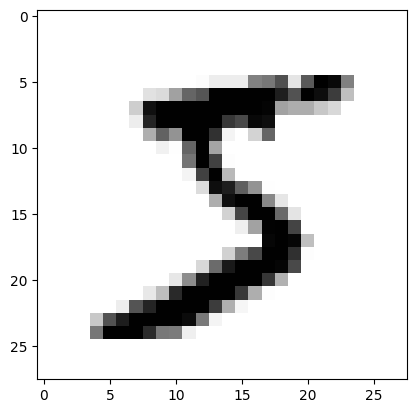

In [4]:
### Preprocess the data

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
### Create the model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
### Train the model

batch_size = 128
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.keras')
print("Saving the model as mnist.keras")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.1829 - loss: 2.2659 - val_accuracy: 0.3959 - val_loss: 2.2157
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.3448 - loss: 2.1855 - val_accuracy: 0.5888 - val_loss: 2.1120
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.4734 - loss: 2.0721 - val_accuracy: 0.6716 - val_loss: 1.9622
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.5561 - loss: 1.9083 - val_accuracy: 0.7277 - val_loss: 1.7505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.6168 - loss: 1.6885 - val_accuracy: 0.7737 - val_loss: 1.4806
The model has successfully trained
Saving the model as mnist.keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,142,816 (27.25 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,761,878 (18.17 MB)

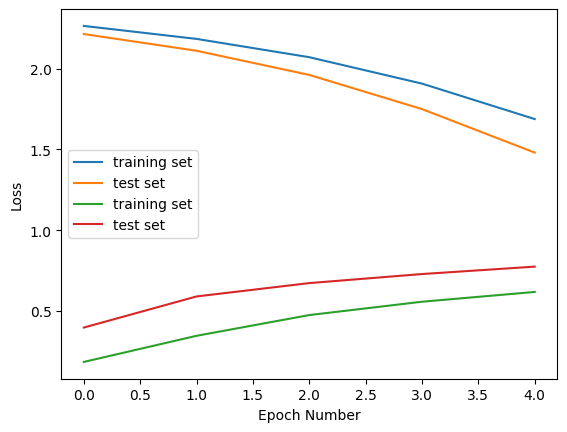

In [9]:
model.summary()

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='training set')
plt.plot(hist.history['val_loss'], label='test set')
plt.plot(hist.history['accuracy'], label='training set')
plt.plot(hist.history['val_accuracy'], label='test set')
plt.legend()

In [10]:
### Evaluate the model

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 - 2s - 6ms/step - accuracy: 0.7737 - loss: 1.4806
Test loss: 1.4806361198425293
Test accuracy: 0.7736999988555908
